In [ ]:
# Importar las librerías necesarias

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import seaborn as sns

tf.random.set_seed(42)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Crear las carpetas para subir las imágenes

!mkdir bulbasaur
!mkdir charmander
!mkdir squirtle

In [ ]:
# Entrar en cada carpeta y descomprimir el archivo zip

%cd bulbasaur
!unzip bulbasaur.zip
%cd ..

%cd charmander
!unzip charmander.zip
%cd ..

%cd squirtle
!unzip squirtle.zip
%cd ..

/content/bulbasaur
Archive:  bulbasaur.zip
  inflating: photo_2023-01-10_15-45-57-924213.jpg  
  inflating: photo_2023-01-23_21-16-37-147669.jpg  
  inflating: pokemon_bulbasaur_fire_concept_3d_model_c4d_max_obj_fbx_ma_lwo_3ds_3dm_stl_4217289_o.jpg  
  inflating: pokemon-battle-figure-translucent-bulbasaur-pkw2403.jpg  
  inflating: pokemon-bulbasaur-face-gorra-adulto.jpg  
  inflating: Pokemon-Bulbasaur-go.jpg  
  inflating: pokemon-bulbasuar-anime-steel-electric-fanart.jpg  
  inflating: pokemon-kanto-figura-vinilo-bulbasaur-10-cm-wave-1-boti.jpg  
  inflating: pokemon-pokepla-collection-bulbasaur-plastic-model.jpg  
  inflating: pokemon-pokepla-collection-bulbasaur-plastic-model2.jpg  
  inflating: shiny-bulbasaur-evolution-perfect-iv-stats-walrein-best-moveset-pokemon-go-9004-1642763882514.jpg  
  inflating: show_bulbasaur-001-078-pokemon-tcg-pokemon-go.jpg  
  inflating: sin-titulo-1_6ezk.jpg   
  inflating: s-l1600.jpg             
  inflating: s-l12003.jpg            
  inflatin

In [ ]:
# Borrar los archivos zip

!rm -rf /content/bulbasaur/bulbasaur.zip
!rm -rf /content/charmander/charmander.zip
!rm -rf /content/squirtle/squirtle.zip

In [ ]:
# Mostrar cuántas imágenes tengo en cada categoría

!ls /content/bulbasaur | wc -l
!ls /content/charmander | wc -l
!ls /content/squirtle | wc -l

325
361
366


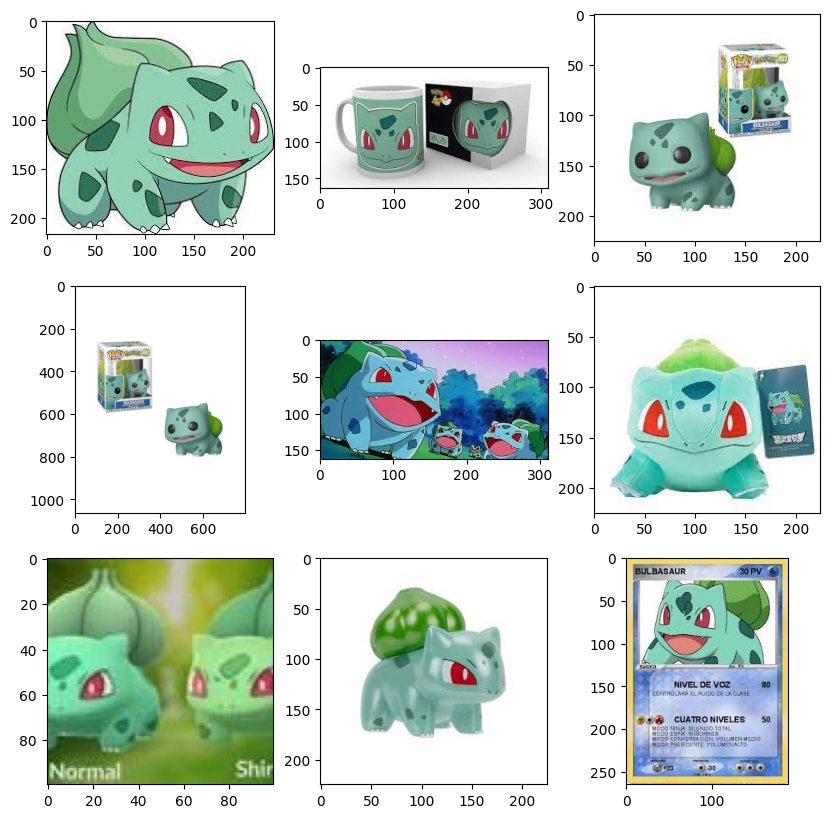

In [ ]:
# Mostrar algunas imágenes

plt.figure(figsize=(10,10))

carpeta = '/content/bulbasaur'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:9]):
  plt.subplot(3,3,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [ ]:
# Crear carpetas para hacer el set de datos

!mkdir dataset
!mkdir dataset/bulbasaur
!mkdir dataset/charmander
!mkdir dataset/squirtle

In [ ]:
# Copiar las imágenes subidas en la nueva carpeta "dataset",
# con el fin de igualar la cantidad de imágenes de cada clase

import shutil

carpeta_fuente = '/content/bulbasaur'
carpeta_destino = '/content/dataset/bulbasaur'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 325:
    # Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
carpeta_fuente = '/content/charmander'
carpeta_destino = '/content/dataset/charmander'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 325:
    # Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
carpeta_fuente = '/content/squirtle'
carpeta_destino = '/content/dataset/squirtle'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 325:
    # Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
# Mostrar cuántas imágenes hay en cada categoría

!ls /content/dataset/bulbasaur | wc -l
!ls /content/dataset/charmander | wc -l
!ls /content/dataset/squirtle | wc -l

325
325
325


In [ ]:
# Create the dataset
data_dir = r'/content/dataset'
num_images = 0

# Iterate over each subdirectory
for dirpath, dirnames, filenames in os.walk(data_dir):
    # Count the number of image files in the current subdirectory
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            num_images += 1

    # Print the number of image files in the current subdirectory
    print(f'Found {num_images} images in directory: {dirpath}')
    num_images = 0

Found 0 images in directory: /content/dataset
Found 325 images in directory: /content/dataset/bulbasaur
Found 325 images in directory: /content/dataset/squirtle
Found 325 images in directory: /content/dataset/charmander


Found 780 images belonging to 3 classes.
Found 195 images belonging to 3 classes.


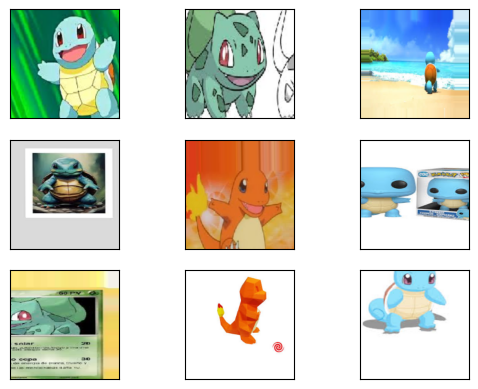

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear el dataset generador

datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    rotation_range=0.4,
    width_shift_range=0.3,
    horizontal_flip=True,
    height_shift_range=0.3,
    shear_range=0.4,
    zoom_range=0.4,
    validation_split=0.2
)

# Generadores para sets de entrenamiento y pruebas

data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     shuffle=True,
                                                     subset='training')

data_gen_pruebas = datagen.flow_from_directory('/content/dataset',
                                               target_size=(224,224),
                                               batch_size=32,
                                               shuffle=True,
                                               subset='validation')

# Mostrar nueve imágenes del generador de entrenamiento

for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [ ]:
# Clases

data_gen_entrenamiento.class_indices

{'bulbasaur': 0, 'charmander': 1, 'squirtle': 2}

In [ ]:
# Transfer learning
# MobileNet-v2

url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [ ]:
# Congelar el modelo descargado

mobilenetv2.trainable = False

In [ ]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2261827 (8.63 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
# Compilar modelo

modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Entrenar el modelo

from tensorflow.keras.callbacks import EarlyStopping

es_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1)

epocas = 50

historial = modelo.fit(
    data_gen_entrenamiento,
    epochs=epocas,
    batch_size=32,
    validation_data=data_gen_pruebas,
    callbacks=[es_callback]
)

Epoch 1/50
25/25 [==============================] - 32s 715ms/step - loss: 1.0231 - accuracy: 0.4987 - val_loss: 0.5955 - val_accuracy: 0.7744
Epoch 2/50
25/25 [==============================] - 16s 634ms/step - loss: 0.5166 - accuracy: 0.8205 - val_loss: 0.4279 - val_accuracy: 0.8462
Epoch 3/50
25/25 [==============================] - 16s 635ms/step - loss: 0.3751 - accuracy: 0.8731 - val_loss: 0.3180 - val_accuracy: 0.8974
Epoch 4/50
25/25 [==============================] - 18s 712ms/step - loss: 0.2775 - accuracy: 0.9154 - val_loss: 0.3141 - val_accuracy: 0.9077
Epoch 5/50
25/25 [==============================] - 17s 671ms/step - loss: 0.2581 - accuracy: 0.9346 - val_loss: 0.2237 - val_accuracy: 0.9436
Epoch 6/50
25/25 [==============================] - 17s 667ms/step - loss: 0.2339 - accuracy: 0.9205 - val_loss: 0.2234 - val_accuracy: 0.9385
Epoch 7/50
25/25 [==============================] - 16s 639ms/step - loss: 0.2130 - accuracy: 0.9321 - val_loss: 0.2149 - val_accuracy: 0.9436

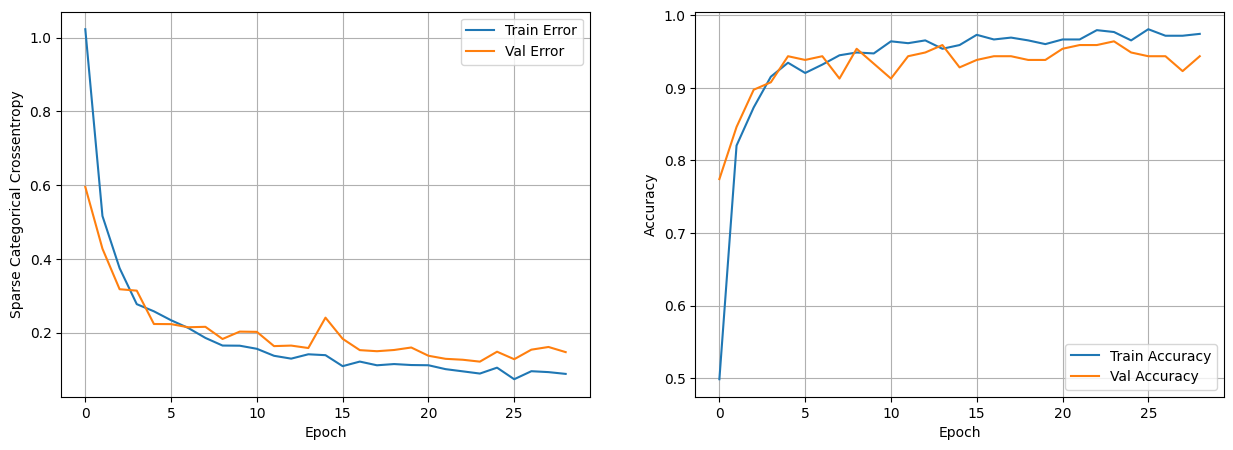

In [ ]:
def show_loss_accuracy_evolution(history):

    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Sparse Categorical Crossentropy')
    ax1.plot(hist['epoch'], hist['loss'], label='Train Error')
    ax1.plot(hist['epoch'], hist['val_loss'], label='Val Error')
    ax1.grid()
    ax1.legend()

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    ax2.plot(hist['epoch'], hist['val_accuracy'], label='Val Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

show_loss_accuracy_evolution(historial)

In [ ]:
# Categorizar una imagen de internet

from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  prediccion = np.argmax(prediccion[0], axis=-1)

  # {'bulbasaur': 0, 'charmander': 1, 'squirtle': 2}
  if prediccion == 0:
    print('El Pokémon es Bulbasaur')
  elif prediccion == 1:
    print('El Pokémon es Charmander')
  elif prediccion == 2:
    print('El Pokémon es Squirtle')

In [ ]:
url = 'https://static.wikia.nocookie.net/espokemon/images/6/60/EP843_Charmander_de_Trovato.png/revision/latest?cb=20140816214242'
categorizar(url)

1/1 [==============================] - 1s 869ms/step
El Pokémon es Charmander


In [ ]:
url = 'https://static.wikia.nocookie.net/espokemon/images/8/86/EP056_Squirtle_de_la_enfermera_Joy.jpg/revision/latest?cb=20100324201250'
categorizar(url)

1/1 [==============================] - 0s 23ms/step
El Pokémon es Squirtle


In [ ]:
url = 'https://static.wikia.nocookie.net/espokemon/images/2/21/EP001_Bulbasaur_en_sue%C3%B1os.png/revision/latest?cb=20080911204119'
categorizar(url)

1/1 [==============================] - 0s 22ms/step
El Pokémon es Bulbasaur


In [ ]:
# Save model and architecture to single file

modelo.save('model.h5', save_format='h5')

In [ ]:
from tensorflow.keras.models import load_model

# Load model

model = load_model('model.h5', custom_objects={'KerasLayer': hub.KerasLayer})

# Summarize model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2261827 (8.63 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
import tensorflow as tf
print(tf.__version__)

import sys
print(sys.version)

2.14.0
3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
